In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

from keras.models import Model
from keras.layers import Dense, Input
from keras.optimizers import Adam

import keras.backend as K
import tensorflow as tf

/home/tambet/.conda/envs/pommer/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# make sure TF does not allocate all memory
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
K.set_session(tf.Session(config=config))

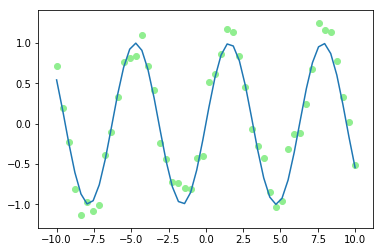

In [3]:
X = np.linspace(-10, 10, 50)[:,np.newaxis]
y_true = np.sin(X)
noise = np.random.normal(scale=0.15, size=(len(y_true), 1))
y_target = y_true + noise

plt.plot(X, y_true)
plt.scatter(X, y_target, c='lightgreen')

In [4]:
x = Input(shape=(1,))
h = Dense(3, activation=K.cos)(x)
y = Dense(1)(h)
model_train = Model(x, y)
model_predict = Model(x, [y, h])
model_train.compile(optimizer=Adam(0.5), loss='mse')

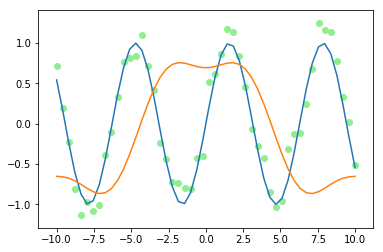

In [5]:
y_pred = model_train.predict_on_batch(X)
fig = plt.figure()
plt.plot(X, y_true)
plt.scatter(X, y_target, c='lightgreen')
line, = plt.plot(X, y_pred)

In [6]:
def init():
    line.set_data(X, y_pred)
    return (line,)

def animate(i):
    model_train.train_on_batch(X, y_target)
    y_pred = model_train.predict_on_batch(X)
    line.set_data(X, y_pred)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)
HTML(anim.to_html5_video())

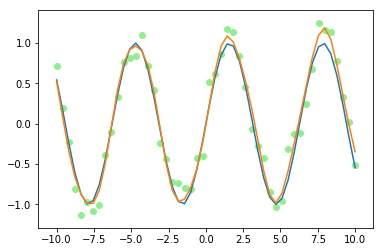

In [7]:
y_pred, h_pred = model_predict.predict_on_batch(X)
W = model_predict.get_weights()
plt.plot(X, y_true)
plt.scatter(X, y_target, c='lightgreen')
plt.plot(X, y_pred)

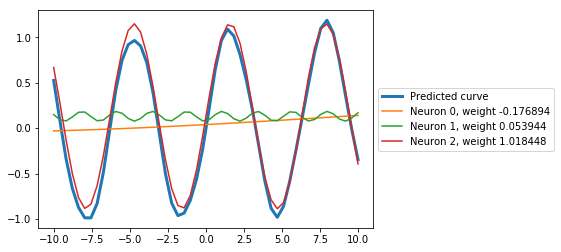

In [8]:
fig = plt.figure()
plt.plot(X, y_pred, lw=3)
lines = plt.plot(X, h_pred * W[2][:, 0] + W[3])
plt.legend(["Predicted curve"] + ["Neuron %d, weight %f" % (i, W[2][i, 0]) for i in range(h_pred.shape[1])], loc='center left', bbox_to_anchor=(1, 0.5))

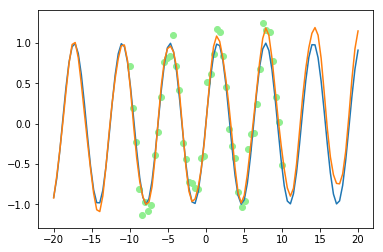

In [9]:
X_wide = np.linspace(-20, 20, 100)[:,np.newaxis]
y_wide_true = np.sin(X_wide)
y_wide_pred = model_train.predict(X_wide)
plt.plot(X_wide, y_wide_true)
plt.scatter(X, y_target, c='lightgreen')
plt.plot(X_wide, y_wide_pred)